In [ ]:
%pip install banglanltk
%pip install emoji
%pip install --upgrade tensorflow keras

In [ ]:
import pandas as pd
import banglanltk as bn
import matplotlib.pyplot as plt
import seaborn as sns

#### READ the dataset

In [ ]:
df = pd.read_csv('DARAZ BANGLA REVIEW.csv',encoding='utf8')
df.head(10)

,Platform,Gender,Category,Price range,Delivery Charge,Product Name,Review,Star
0,Daraz,male,Watch,0-150,free,Current black color formal analog watches for ...,কিছু বলবো না ভাই... এই প্রথম এমন টা হলো... যদি...,1
1,Daraz,male,Watch,0-150,free,Current black color formal analog watches for ...,ছবিতে দেখে যত ভালো কোয়ালিটি মনে হয় তেমন লাগে ন...,1
2,Daraz,male,Watch,0-150,free,Current black color formal analog watches for ...,I have got it...it’s nice..but battery dead......,1
3,Daraz,male,Watch,0-150,free,Current black color formal analog watches for ...,ঘড়ির বেল্ট খুব নিম্নমানের।রিভিউ দেখে নিলাম কি...,1
4,Daraz,male,Watch,0-150,free,Current black color formal analog watches for ...,ঘড়ির বেলটা যে এত পচা মানের তা জানলে ঘড়িটা আম...,1
5,Daraz,male,Watch,0-150,free,Current black color formal analog watches for ...,"আমি যেমন ভেবেছিলাম তেমন না ,আমি এই ঘড়িটি কিনে ...",1
6,Daraz,male,Watch,0-150,free,Current black color formal analog watches for ...,কিছু বলবো না ভাই... এই প্রথম এমন টা হলো... যদি...,2
7,Daraz,male,Watch,0-150,free,Current black color formal analog watches for ...,ছবিতে দেখে যত ভালো কোয়ালিটি মনে হয় তেমন লাগে ন...,2
8,Daraz,male,Watch,0-150,free,Current black color formal analog watches for ...,যে জন্য ঘড়িটা নিলাম তাই হচ্ছে না। ব্যাটারি শেষ...,2
9,Daraz,male,Watch,0-150,free,Current black color formal analog watches for ...,আলহামদুলিল্লাহ যেমন চেয়েছি তেমনই পেয়েছি। কিন্...,3


/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:25: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from current font.
  plt.savefig(f, bbox_inches='tight')
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:25: UserWarning: Matplotlib currently does not support Bengali natively.
  plt.savefig(f, bbox_inches='tight')
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:25: UserWarning: Glyph 2495 (\N{BENGALI VOWEL SIGN I}) missing from current font.
  plt.savefig(f, bbox_inches='tight')
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:25: UserWarning: Glyph 2459 (\N{BENGALI LETTER CHA}) missing from current font.
  plt.savefig(f, bbox_inches='tight')
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:25: UserWarning: Glyph 2497 (\N{BENGALI VOWEL SIGN U}) missing from current font.
  plt.savefig(f, bbox_inches='tight')
/usr/local/lib/python3.10/dist-packages/google/colab/_

import numpy as np
from google.colab import autoviz
df_8871726214360069429 = autoviz.get_df('df_8871726214360069429')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8871726214360069429, *['Star'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8871726214360069429 = autoviz.get_df('df_8871726214360069429')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8871726214360069429, *['Star'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8871726214360069429 = autoviz.get_df('df_8871726214360069429')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_8871726214360069429, *['Review'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8871726214360069429 = autoviz.get_df('df_8871726214360069429')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8871726214360069429, *['Star', 'Review'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8871726214360069429 = autoviz.get_df('df_8871726214360069429')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8871726214360069429, *['Star', 'count()', 'Review'], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


Show the dataframe

In [ ]:
# display the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)
df.columns

Shape of the DataFrame: (2199, 8)


Index(['Platform ', 'Gender', 'Category', 'Price range', 'Delivery Charge',
       'Product Name', 'Review', 'Star'],
      dtype='object')

convert the colum name to lowercase

In [ ]:
# convert column names to lowercase
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['platform ', 'gender', 'category', 'price range', 'delivery charge',
       'product name', 'review', 'star'],
      dtype='object')

drop the null and duplicate values

In [ ]:
# Check for missing values
print(f"Number of null & Duplicated values: \n{df.isnull().sum() + df.duplicated().sum()}")

df.count()

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

print('\nAFTER Removing Null & Duplicated Values: \n')

# Check for missing values
print(f"Number of null values: \n{df.isnull().sum()}")

df.count()


Number of null & Duplicated values: 
platform           10
gender             10
category           10
price range        10
delivery charge    10
product name       10
review             10
star               10
dtype: int64

AFTER Removing Null & Duplicated Values: 

Number of null values: 
platform           0
gender             0
category           0
price range        0
delivery charge    0
product name       0
review             0
star               0
dtype: int64


platform           2189
gender             2189
category           2189
price range        2189
delivery charge    2189
product name       2189
review             2189
star               2189
dtype: int64

show the star numbers

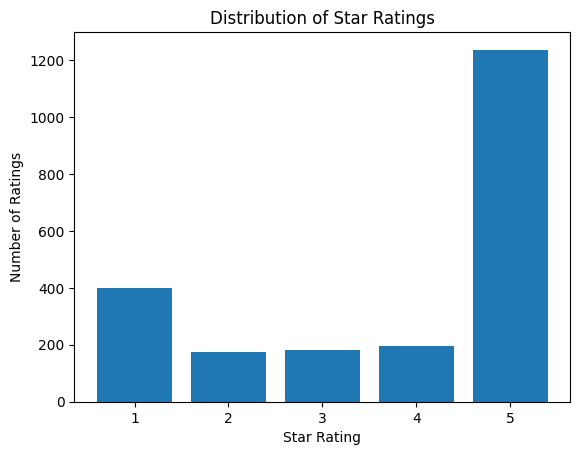

In [ ]:
import matplotlib.pyplot as plt

# Count the number of ratings for each star category
rating_counts = df['star'].value_counts().sort_index()

# Plot the number of ratings
plt.bar(rating_counts.index, rating_counts.values)

# Set the labels and title
plt.xlabel('Star Rating')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Star Ratings')

# Show the plot
plt.show()

In [ ]:
def label_sentiment(star):
    if star in [1, 2]:
        return 'Negative'
    elif star == 3:
        return 'Neutral'
    elif star in [4, 5]:
        return 'Positive'

df['sentiment'] = df['star'].apply(label_sentiment)
df.head(5)

,platform,gender,category,price range,delivery charge,product name,review,star,sentiment
0,Daraz,male,Watch,0-150,free,Current black color formal analog watches for ...,কিছু বলবো না ভাই... এই প্রথম এমন টা হলো... যদি...,1,Negative
1,Daraz,male,Watch,0-150,free,Current black color formal analog watches for ...,ছবিতে দেখে যত ভালো কোয়ালিটি মনে হয় তেমন লাগে ন...,1,Negative
2,Daraz,male,Watch,0-150,free,Current black color formal analog watches for ...,I have got it...it’s nice..but battery dead......,1,Negative
3,Daraz,male,Watch,0-150,free,Current black color formal analog watches for ...,ঘড়ির বেল্ট খুব নিম্নমানের।রিভিউ দেখে নিলাম কি...,1,Negative
4,Daraz,male,Watch,0-150,free,Current black color formal analog watches for ...,ঘড়ির বেলটা যে এত পচা মানের তা জানলে ঘড়িটা আম...,1,Negative


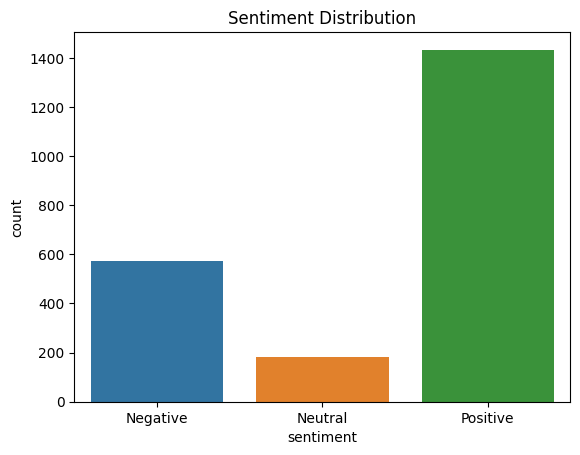

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of sentiment labels
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

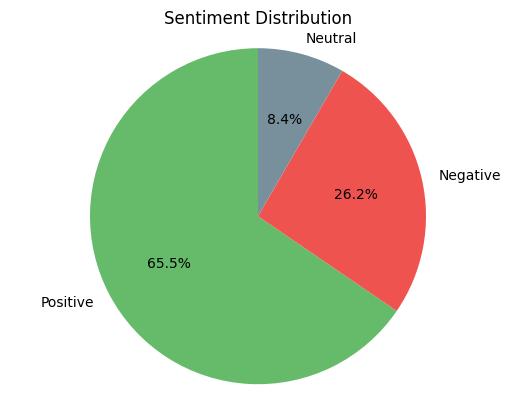

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of each sentiment category
positive_percentage = (df['sentiment'] == 'Positive').mean() * 100
negative_percentage = (df['sentiment'] == 'Negative').mean() * 100
neutral_percentage = (df['sentiment'] == 'Neutral').mean() * 100

# Create a pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_percentage, negative_percentage, neutral_percentage]
colors = ['#66BB6A', '#EF5350', '#78909C']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
def plot_positivity(column_name):
  # Calculate sentiment distribution by gender
  column_sentiment_counts = df.groupby(column_name)['sentiment'].value_counts().unstack().fillna(0)

  # Plotting the sentiment distribution
  ax = column_sentiment_counts.plot(kind='bar', stacked=True, colormap='coolwarm')

  # Set plot title, labels, and legend
  plt.title(f'Sentiment Distribution by {column_name.capitalize()}')
  plt.xlabel(column_name.capitalize())
  plt.ylabel('Count')
  plt.legend(loc='upper right')

  # # Print sentiment counts by gender
  gender_labels = column_sentiment_counts.index
#   sentiment_labels = column_sentiment_counts.columns

  # Display the plot
  plt.show()
  print()

  high_positive_negative_ratio= 0
  high_positive_negaive_label = ""

  low_positive_negative_ratio= 100
  low_positive_negaive_label = ""

  for i, column_label in enumerate(gender_labels):
    sentiment_counts = column_sentiment_counts.loc[column_label]
    sentiment_total = sentiment_counts.Positive + sentiment_counts.Negative + sentiment_counts.Neutral
    # print(sentiment_counts)
    # print()

    print(f"Label name: {column_label}")
    positive_percentage = (sentiment_counts.Positive / sentiment_total) * 100
    negative_percentage = (sentiment_counts.Negative / sentiment_total) * 100

    if (positive_percentage - negative_percentage ) > high_positive_negative_ratio :
      high_positive_negative_ratio = positive_percentage - negative_percentage
      high_positive_negaive_label = column_label

    if (positive_percentage - negative_percentage ) <  low_positive_negative_ratio :
      low_positive_negative_ratio = positive_percentage - negative_percentage
      low_positive_negaive_label = column_label

    print(f"Positivity: {int(positive_percentage)}%")
    print(f"Negativity: {int(negative_percentage )}%")
    print()

  print(f"Among all of them, ✅{high_positive_negaive_label}✅ have most positivity")
  print(f"Among all of them, ❌{low_positive_negaive_label}❌ have least positivity")

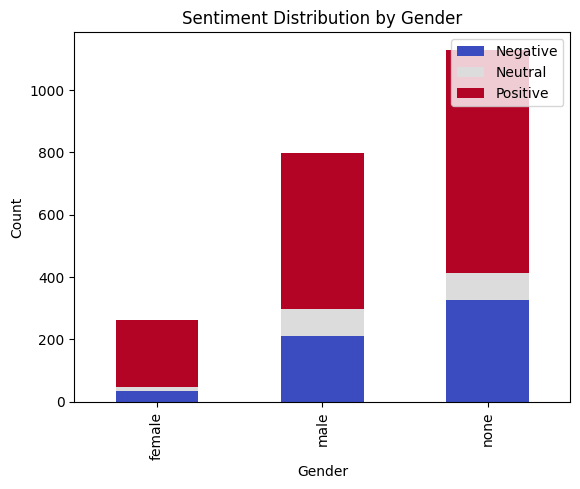


Label name: female
Positivity: 82%
Negativity: 13%

Label name: male
Positivity: 62%
Negativity: 26%

Label name: none
Positivity: 63%
Negativity: 28%

Among all of them, ✅female✅ have most positivity
Among all of them, ❌none❌ have least positivity


In [ ]:
plot_positivity("gender")

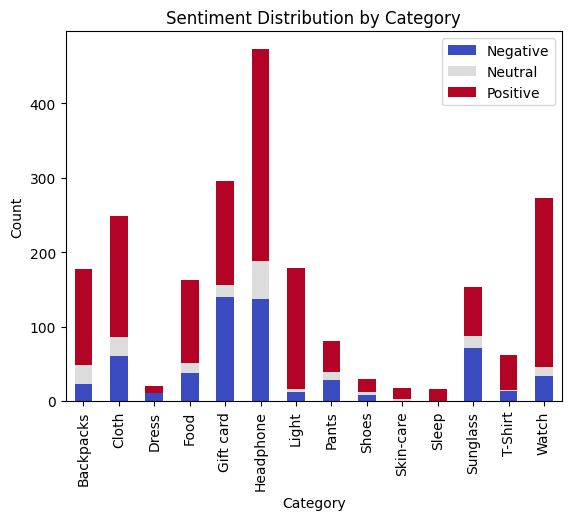


Label name: Backpacks
Positivity: 73%
Negativity: 12%

Label name: Cloth
Positivity: 65%
Negativity: 24%

Label name: Dress
Positivity: 45%
Negativity: 55%

Label name: Food
Positivity: 68%
Negativity: 22%

Label name: Gift card
Positivity: 47%
Negativity: 47%

Label name: Headphone
Positivity: 60%
Negativity: 28%

Label name: Light
Positivity: 91%
Negativity: 6%

Label name: Pants
Positivity: 51%
Negativity: 34%

Label name: Shoes
Positivity: 58%
Negativity: 27%

Label name: Skin-care
Positivity: 88%
Negativity: 0%

Label name: Sleep
Positivity: 100%
Negativity: 0%

Label name: Sunglass
Positivity: 43%
Negativity: 46%

Label name: T-Shirt
Positivity: 75%
Negativity: 20%

Label name: Watch
Positivity: 83%
Negativity: 12%

Among all of them, ✅Sleep✅ have most positivity
Among all of them, ❌Dress❌ have least positivity


In [ ]:
plot_positivity("category")

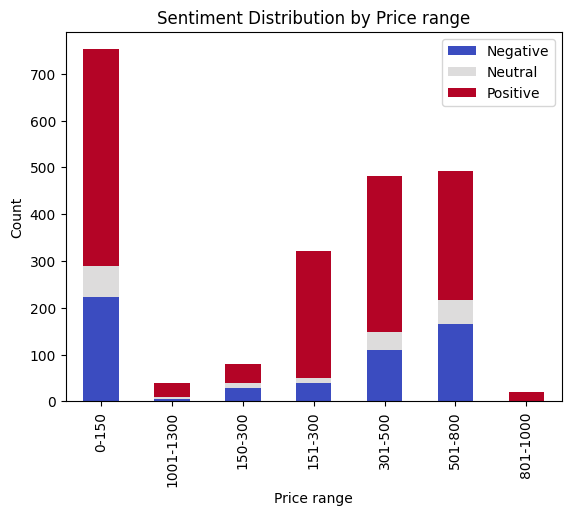


Label name: 0-150
Positivity: 61%
Negativity: 29%

Label name: 1001-1300
Positivity: 76%
Negativity: 12%

Label name: 150-300
Positivity: 51%
Negativity: 34%

Label name: 151-300
Positivity: 84%
Negativity: 12%

Label name: 301-500
Positivity: 69%
Negativity: 22%

Label name: 501-800
Positivity: 56%
Negativity: 33%

Label name: 801-1000
Positivity: 90%
Negativity: 0%

Among all of them, ✅801-1000✅ have most positivity
Among all of them, ❌150-300❌ have least positivity


In [ ]:
plot_positivity("price range")

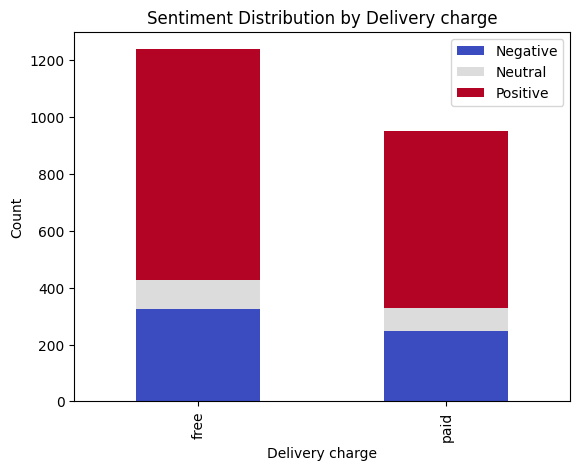


Label name: free
Positivity: 65%
Negativity: 26%

Label name: paid
Positivity: 65%
Negativity: 25%

Among all of them, ✅paid✅ have most positivity
Among all of them, ❌free❌ have least positivity


In [ ]:
plot_positivity("delivery charge")

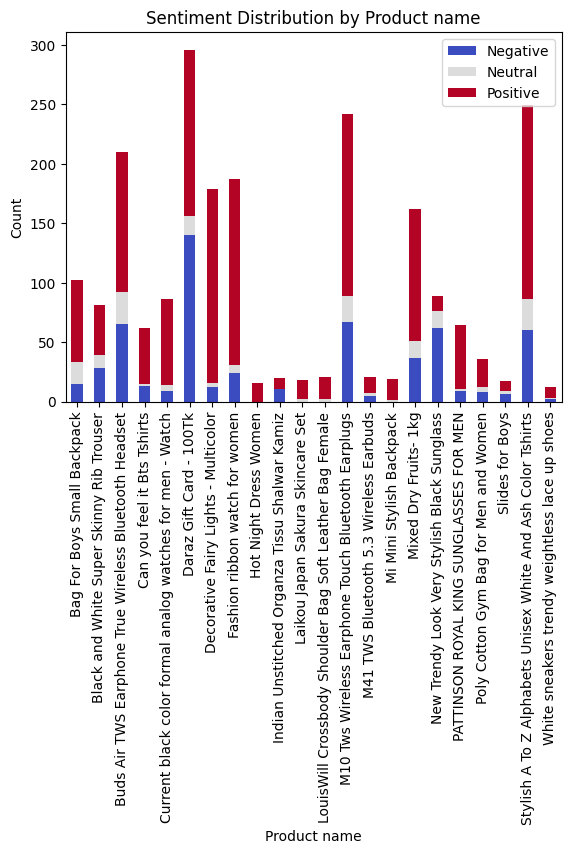


Label name: Bag For Boys Small Backpack
Positivity: 67%
Negativity: 14%

Label name: Black and White Super Skinny Rib Trouser
Positivity: 51%
Negativity: 34%

Label name: Buds Air TWS Earphone True Wireless Bluetooth Headset
Positivity: 56%
Negativity: 30%

Label name: Can you feel it Bts Tshirts
Positivity: 75%
Negativity: 20%

Label name: Current black color formal analog watches for men - Watch
Positivity: 83%
Negativity: 10%

Label name: Daraz Gift Card - 100Tk
Positivity: 47%
Negativity: 47%

Label name: Decorative Fairy Lights - Multicolor
Positivity: 91%
Negativity: 6%

Label name: Fashion ribbon watch for women
Positivity: 83%
Negativity: 12%

Label name: Hot Night Dress Women
Positivity: 100%
Negativity: 0%

Label name: Indian Unstitched Organza Tissu Shalwar Kamiz
Positivity: 45%
Negativity: 55%

Label name: Laikou Japan Sakura Skincare Set
Positivity: 88%
Negativity: 0%

Label name: LouisWill Crossbody Shoulder Bag Soft Leather Bag Female
Positivity: 90%
Negativity: 0%

Lab

In [ ]:
plot_positivity("product name")

In [ ]:
# # remove all the comments that have less than 3 words
# df = df[df['review'].apply(lambda x: len(x.split()) >= 3)]

# print("After deleting small comments: ")
# print(df.count())
# df.head(5)

In [ ]:
def clean_comment(text):
    comment =  bn.clean_text(text)
    return comment

df['review'] = df['review'].apply(clean_comment)
df.head(5)

,platform,gender,category,price range,delivery charge,product name,review,star,sentiment
0,Daraz,male,Watch,0-150,free,Current black color formal analog watches for ...,কিছু বলবো না ভাই এই প্রথম এমন টা হলো যদিও সেলা...,1,Negative
1,Daraz,male,Watch,0-150,free,Current black color formal analog watches for ...,ছবিতে দেখে যত ভালো কোয়ালিটি মনে হয় তেমন লাগে ন...,1,Negative
2,Daraz,male,Watch,0-150,free,Current black color formal analog watches for ...,I have got itits nicebut battery dead যে জন্য ...,1,Negative
3,Daraz,male,Watch,0-150,free,Current black color formal analog watches for ...,ঘড়ির বেল্ট খুব নিম্নমানেররিভিউ দেখে নিলাম কিন...,1,Negative
4,Daraz,male,Watch,0-150,free,Current black color formal analog watches for ...,ঘড়ির বেলটা যে এত পচা মানের তা জানলে ঘড়িটা আম...,1,Negative


Tokenzation

In [ ]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

# Tokenize each comment and store the result in a new column called 'tokens'
df['tokens'] = df['review'].apply(word_tokenize)
df.tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0       [কিছু, বলবো, না, ভাই, এই, প্রথম, এমন, টা, হলো,...
1       [ছবিতে, দেখে, যত, ভালো, কোয়ালিটি, মনে, হয়, তেম...
2       [I, have, got, itits, nicebut, battery, dead, ...
3       [ঘড়ির, বেল্ট, খুব, নিম্নমানেররিভিউ, দেখে, নিল...
4       [ঘড়ির, বেলটা, যে, এত, পচা, মানের, তা, জানলে, ...
                              ...                        
2194    [এত, কম, দামে, ভালো, একটি, গেঞ্জি, তবে, গরম, ল...
2195    [প্রাইস, হিসেবে, কাপড়টা, অনেক, ভালো, ছিল, একট...
2196                   [এটা, খুব, ভালোনিতে, পারেন, আপনিও]
2197    [আলহামদুলিল্লাহ্, যেমোনটা, দেখেছি, টিক, তাই, প...
2198    [একদম, ফিট, হয়েছে, যেটা, অর্ডার, করেছি, সেটাই,...
Name: tokens, Length: 2189, dtype: object

Stopwords

In [ ]:
nltk.download('stopwords')

from nltk.corpus import stopwords

# Define a set of stop words to remove
stop_words = set(stopwords.words('bengali'))

# Remove stop words from each comment's token list
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

df.tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0       [বলবো, ভাই, টা, সেলার, ভাই, বলছে, ড্যামেজড, প্...
1       [ছবিতে, ভালো, কোয়ালিটি, লাগে, ঘড়ি, ভালো, অল্পত...
2       [I, have, got, itits, nicebut, battery, dead, ...
3            [ঘড়ির, বেল্ট, নিম্নমানেররিভিউ, নিলাম, হতাশ]
4       [ঘড়ির, বেলটা, পচা, মানের, জানলে, ঘড়িটা, নিতামই]
                              ...                        
2194    [কম, দামে, ভালো, গেঞ্জি, গরম, লাগতে, কাপড়, সে...
2195    [প্রাইস, হিসেবে, কাপড়টা, ভালো, একটু, হালকা, ম...
2196                                    [ভালোনিতে, আপনিও]
2197    [আলহামদুলিল্লাহ্, যেমোনটা, দেখেছি, টিক, পাইছি,...
2198    [একদম, ফিট, হয়েছে, যেটা, অর্ডার, করেছি, পেয়েছি...
Name: tokens, Length: 2189, dtype: object

remove emoji

In [ ]:
import re

# Function to remove emojis from a string
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"  # Enclosed Characters
        "]+"
    )
    return emoji_pattern.sub(r"", text)

# Apply the remove_emojis function to each token in the 'tokens' column
df['tokens'] = df['tokens'].apply(lambda x: [remove_emojis(word) for word in x])

df.tokens


0       [বলবো, ভাই, টা, সেলার, ভাই, বলছে, ড্যামেজড, প্...
1       [ছবিতে, ভালো, কোয়ালিটি, লাগে, ঘড়ি, ভালো, অল্পত...
2       [I, have, got, itits, nicebut, battery, dead, ...
3            [ঘড়ির, বেল্ট, নিম্নমানেররিভিউ, নিলাম, হতাশ]
4       [ঘড়ির, বেলটা, পচা, মানের, জানলে, ঘড়িটা, নিতামই]
                              ...                        
2194    [কম, দামে, ভালো, গেঞ্জি, গরম, লাগতে, কাপড়, সে...
2195    [প্রাইস, হিসেবে, কাপড়টা, ভালো, একটু, হালকা, ম...
2196                                    [ভালোনিতে, আপনিও]
2197    [আলহামদুলিল্লাহ্, যেমোনটা, দেখেছি, টিক, পাইছি,...
2198    [একদম, ফিট, হয়েছে, যেটা, অর্ডার, করেছি, পেয়েছি...
Name: tokens, Length: 2189, dtype: object

remove english words

In [ ]:
import re

# Function to check if a word contains English characters
def has_english_characters(word):
    return bool(re.search(r'[a-zA-Z]', word))

# Remove English words from each token list
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if not has_english_characters(word)])

df.tokens

0       [বলবো, ভাই, টা, সেলার, ভাই, বলছে, ড্যামেজড, প্...
1       [ছবিতে, ভালো, কোয়ালিটি, লাগে, ঘড়ি, ভালো, অল্পত...
2              [ঘড়িটা, নিলাম, ব্যাটারি, শেষ, চলছে, লাভ, ]
3            [ঘড়ির, বেল্ট, নিম্নমানেররিভিউ, নিলাম, হতাশ]
4       [ঘড়ির, বেলটা, পচা, মানের, জানলে, ঘড়িটা, নিতামই]
                              ...                        
2194    [কম, দামে, ভালো, গেঞ্জি, গরম, লাগতে, কাপড়, সে...
2195    [প্রাইস, হিসেবে, কাপড়টা, ভালো, একটু, হালকা, ম...
2196                                    [ভালোনিতে, আপনিও]
2197    [আলহামদুলিল্লাহ্, যেমোনটা, দেখেছি, টিক, পাইছি,...
2198    [একদম, ফিট, হয়েছে, যেটা, অর্ডার, করেছি, পেয়েছি...
Name: tokens, Length: 2189, dtype: object

remove punctuations

In [ ]:
import string

# Function to check if a word consists of only punctuation marks
def consists_only_of_punctuation(word):
    return all(char in string.punctuation for char in word)

# Remove individual punctuation marks from each token list
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if not consists_only_of_punctuation(word)])

df.tokens

0       [বলবো, ভাই, টা, সেলার, ভাই, বলছে, ড্যামেজড, প্...
1       [ছবিতে, ভালো, কোয়ালিটি, লাগে, ঘড়ি, ভালো, অল্পত...
2                [ঘড়িটা, নিলাম, ব্যাটারি, শেষ, চলছে, লাভ]
3            [ঘড়ির, বেল্ট, নিম্নমানেররিভিউ, নিলাম, হতাশ]
4       [ঘড়ির, বেলটা, পচা, মানের, জানলে, ঘড়িটা, নিতামই]
                              ...                        
2194    [কম, দামে, ভালো, গেঞ্জি, গরম, লাগতে, কাপড়, সে...
2195    [প্রাইস, হিসেবে, কাপড়টা, ভালো, একটু, হালকা, ম...
2196                                    [ভালোনিতে, আপনিও]
2197    [আলহামদুলিল্লাহ্, যেমোনটা, দেখেছি, টিক, পাইছি,...
2198    [একদম, ফিট, হয়েছে, যেটা, অর্ডার, করেছি, পেয়েছি...
Name: tokens, Length: 2189, dtype: object

remove bangla numbers

In [ ]:
import re

# Function to check if a word contains English characters or Bangla numbers
def has_english_or_bangla_numbers(word):
    return bool(re.search(r'[a-zA-Z০-৯]', word))

# Remove English words and Bangla numbers from each token list
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if not has_english_or_bangla_numbers(word)])

df.tokens

0       [বলবো, ভাই, টা, সেলার, ভাই, বলছে, ড্যামেজড, প্...
1       [ছবিতে, ভালো, কোয়ালিটি, লাগে, ঘড়ি, ভালো, অল্পত...
2                [ঘড়িটা, নিলাম, ব্যাটারি, শেষ, চলছে, লাভ]
3            [ঘড়ির, বেল্ট, নিম্নমানেররিভিউ, নিলাম, হতাশ]
4       [ঘড়ির, বেলটা, পচা, মানের, জানলে, ঘড়িটা, নিতামই]
                              ...                        
2194    [কম, দামে, ভালো, গেঞ্জি, গরম, লাগতে, কাপড়, সে...
2195    [প্রাইস, হিসেবে, কাপড়টা, ভালো, একটু, হালকা, ম...
2196                                    [ভালোনিতে, আপনিও]
2197    [আলহামদুলিল্লাহ্, যেমোনটা, দেখেছি, টিক, পাইছি,...
2198    [একদম, ফিট, হয়েছে, যেটা, অর্ডার, করেছি, পেয়েছি...
Name: tokens, Length: 2189, dtype: object

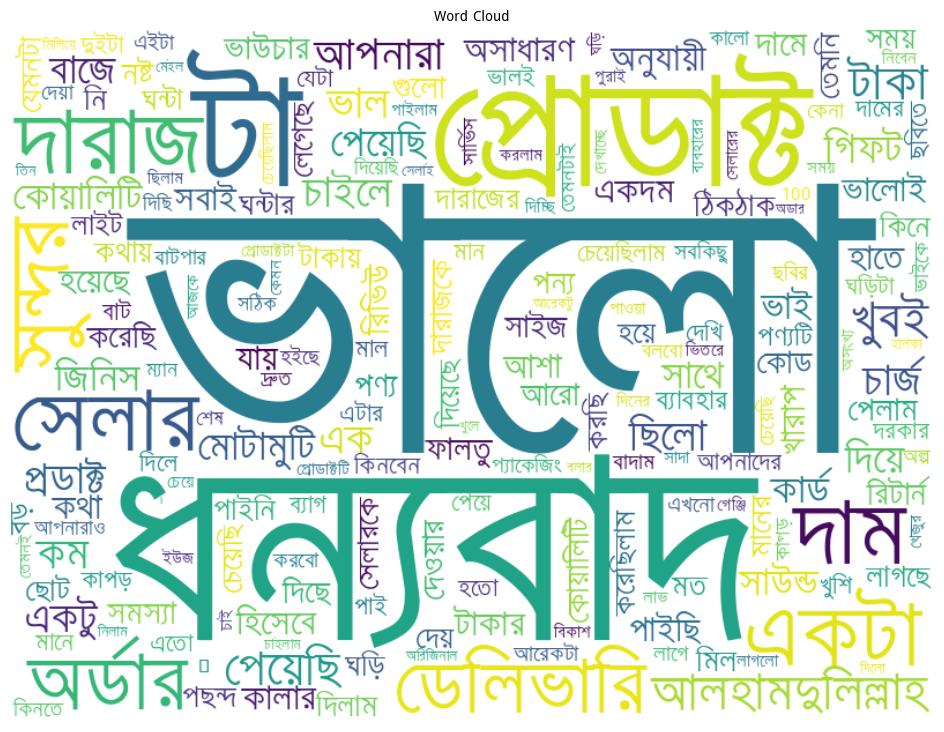

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.font_manager import FontProperties

# Drop missing values
df = df.dropna()

# Create an empty dictionary to store word frequencies
word_counts = {}

# Loop over each comment
for comment in df['tokens']:
    # Loop over each word in the comment
    for word in comment:
        # Increment the count for this word
        word_counts[word] = word_counts.get(word, 0) + 1

# create a FontProperties object with a Bengali font
# bengali_font = FontProperties(fname='/content/drive/MyDrive/comments/Siyamrupali.ttf')
bengali_font = FontProperties(fname='/content/drive/MyDrive/Daraz Sentiment Analysis/version 1/Siyamrupali.ttf')


# Create a WordCloud object with the desired parameters
# wordcloud = WordCloud(background_color='white', width=800, height=600, font_path='/content/drive/MyDrive/comments/Siyamrupali.ttf')
wordcloud = WordCloud(background_color='white', width=800, height=600, font_path='/content/drive/MyDrive/Daraz Sentiment Analysis/version 1/Siyamrupali.ttf')


# Generate the word cloud from the word counts
wordcloud.generate_from_frequencies(word_counts)

# Set up the plot
plt.figure(figsize=(12, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud', fontproperties=bengali_font)

# Show the plot
plt.show()

In [ ]:
# Create a function to label each token with its corresponding sentiment label
def label_sentiment(token, sentiment):
    if sentiment == 'Positive':
        return (token, 'positive')
    elif sentiment == 'Negative':
        return (token, 'negative')
    else:
        return (token, 'neutral')

# Apply the label_sentiment function to each token in the 'tokens' column and store the result in a new column called 'sentiment_labels'
df['sentiment_labels'] = df.apply(lambda row: [label_sentiment(token, row['sentiment']) for token in row['tokens']], axis=1)

# Print the resulting dataframe
print(df['sentiment_labels'])

0       [(বলবো, negative), (ভাই, negative), (টা, negat...
1       [(ছবিতে, negative), (ভালো, negative), (কোয়ালিট...
2       [(ঘড়িটা, negative), (নিলাম, negative), (ব্যাটা...
3       [(ঘড়ির, negative), (বেল্ট, negative), (নিম্নম...
4       [(ঘড়ির, negative), (বেলটা, negative), (পচা, n...
                              ...                        
2194    [(কম, positive), (দামে, positive), (ভালো, posi...
2195    [(প্রাইস, positive), (হিসেবে, positive), (কাপড...
2196            [(ভালোনিতে, positive), (আপনিও, positive)]
2197    [(আলহামদুলিল্লাহ্, positive), (যেমোনটা, positi...
2198    [(একদম, positive), (ফিট, positive), (হয়েছে, po...
Name: sentiment_labels, Length: 2189, dtype: object


Number of positve words: 14204
Number of Negative words: 7580
Number of Neutral words: 1713




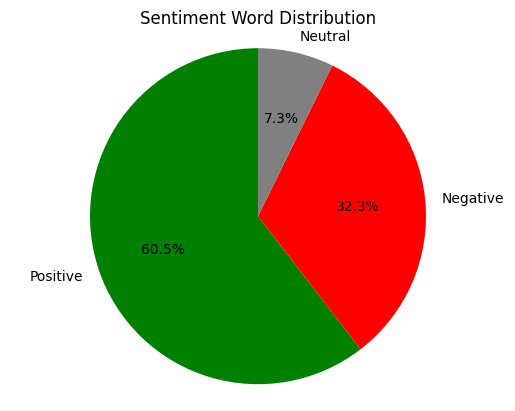

In [ ]:
import matplotlib.pyplot as plt

# Create empty lists to store the positive, negative, and neutral words
positive_words = []
negative_words = []
neutral_words = []

# Iterate over the rows in the dataframe and append each word to the appropriate list
for index, row in df.iterrows():
    for token, label in row['sentiment_labels']:
        if label == 'positive':
            positive_words.append(token.lower())
        elif label == 'negative':
            negative_words.append(token.lower())
        else:
            neutral_words.append(token.lower())

# Count the number of words in each list
num_positive_words = len(positive_words)
num_negative_words = len(negative_words)
num_neutral_words = len(neutral_words)

print(f"Number of positve words: {num_positive_words}")
print(f"Number of Negative words: {num_negative_words}")
print(f"Number of Neutral words: {num_neutral_words}")
print("\n")

# Create a pie chart to visualize the results
labels = ['Positive', 'Negative', 'Neutral']
sizes = [num_positive_words, num_negative_words, num_neutral_words]
colors = ['green', 'red', 'grey']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('Sentiment Word Distribution')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Create a list of tokenized comments
comment_list = df['tokens'].tolist()

# Create a list of corresponding sentiment labels
sentiment_list = df['sentiment'].tolist()

# Convert the tokenized comments into bag-of-words representation
vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
X = vectorizer.fit_transform(comment_list)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, sentiment_list, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train the logistic regression model with updated parameters
clf = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')
clf.fit(X_train, y_train)

# Predict labels for the test set
lr_predictions = clf.predict(X_test)

# Calculate accuracy using accuracy_score
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Accuracy:", lr_accuracy)

Accuracy: 0.776255707762557


Logistic Regression:
              precision    recall  f1-score   support

    Negative       0.72      0.71      0.71       107
     Neutral       0.36      0.09      0.14        47
    Positive       0.81      0.92      0.86       284

    accuracy                           0.78       438
   macro avg       0.63      0.57      0.57       438
weighted avg       0.74      0.78      0.75       438



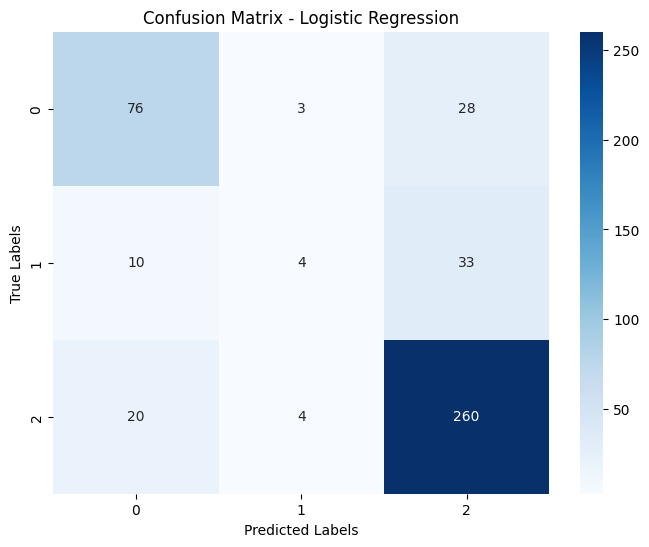

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate classification report
lr_report = classification_report(y_test, lr_predictions,zero_division=0)
print("Logistic Regression:")
print(lr_report)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, lr_predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model with updated parameters
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict labels for the test set
knn_predictions = knn.predict(X_test)

# Calculate accuracy using accuracy_score
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy:", knn_accuracy)

Accuracy: 0.730593607305936


K-nearest Neighbors:
              precision    recall  f1-score   support

    Negative       0.67      0.55      0.61       107
     Neutral       0.33      0.04      0.08        47
    Positive       0.75      0.91      0.82       284

    accuracy                           0.73       438
   macro avg       0.59      0.50      0.50       438
weighted avg       0.69      0.73      0.69       438



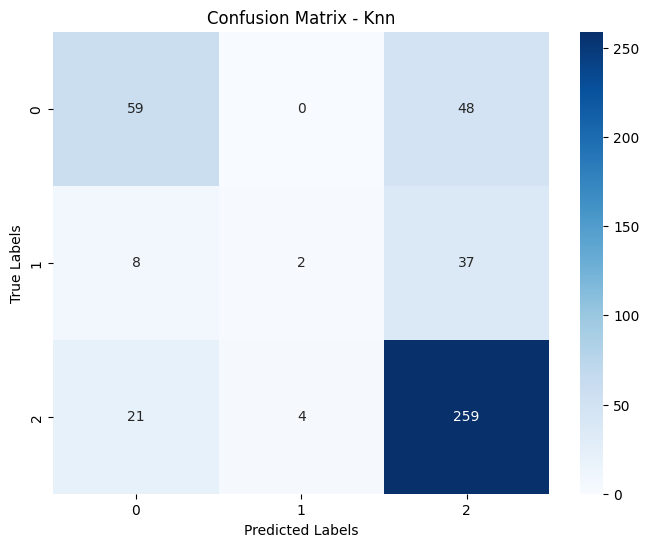

In [ ]:
knn_report = classification_report(y_test, knn_predictions,zero_division=0)
print("K-nearest Neighbors:")
print(knn_report)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, knn_predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Knn')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting model with updated parameters
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Predict labels for the test set
gb_predictions = gb.predict(X_test)

# Calculate accuracy using accuracy_score
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Accuracy:", gb_accuracy)

Accuracy: 0.7374429223744292


Gradient Boosting:
              precision    recall  f1-score   support

    Negative       0.75      0.51      0.61       107
     Neutral       0.00      0.00      0.00        47
    Positive       0.74      0.94      0.83       284

    accuracy                           0.74       438
   macro avg       0.50      0.49      0.48       438
weighted avg       0.66      0.74      0.69       438



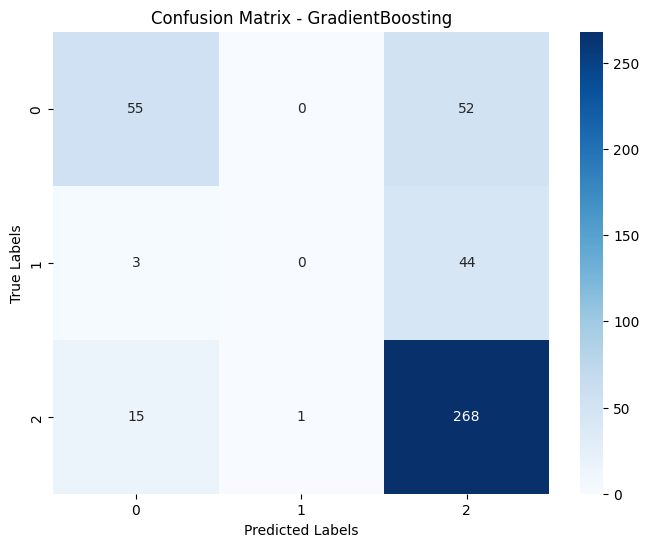

In [ ]:
# Generate classification report
gb_report = classification_report(y_test, gb_predictions,zero_division=0)
print("Gradient Boosting:")
print(gb_report)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, gb_predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - GradientBoosting')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.svm import SVC

# Train the SVM model with updated parameters
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predict labels for the test set
svm_predictions = svm.predict(X_test)

# Calculate accuracy using accuracy_score
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Accuracy:", svm_accuracy)



Accuracy: 0.769406392694064


Support Vector Machines:
              precision    recall  f1-score   support

    Negative       0.71      0.72      0.71       107
     Neutral       0.31      0.11      0.16        47
    Positive       0.81      0.90      0.85       284

    accuracy                           0.77       438
   macro avg       0.61      0.57      0.58       438
weighted avg       0.73      0.77      0.75       438



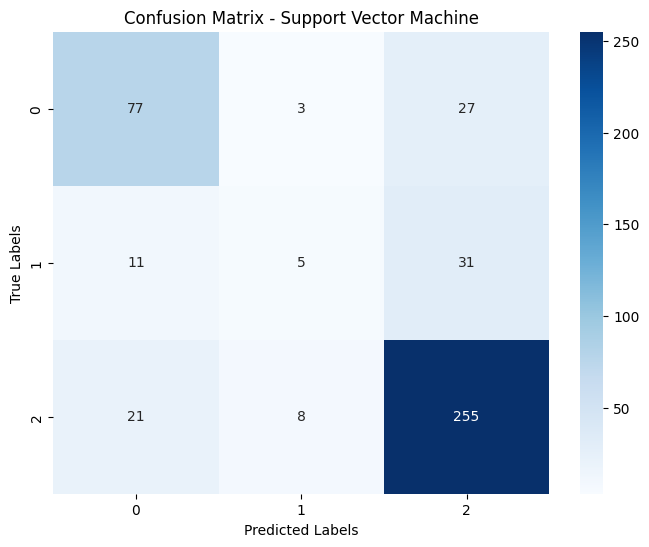

In [ ]:
# Generate classification report
svm_report = classification_report(y_test, svm_predictions,zero_division=0)
print("Support Vector Machines:")
print(svm_report)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Support Vector Machine')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train the Random Forest model with updated parameters
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict labels for the test set
rf_predictions = rf.predict(X_test)

# Calculate accuracy using accuracy_score
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy:", rf_accuracy)

Accuracy: 0.8013698630136986


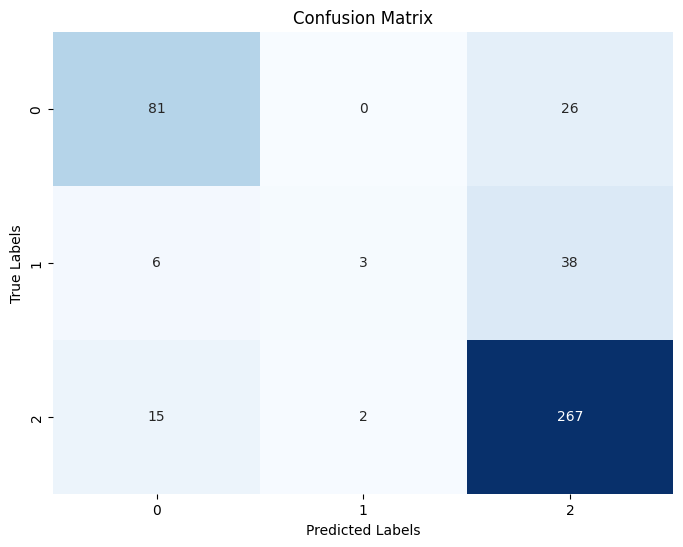

Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.76      0.78       107
     Neutral       0.60      0.06      0.12        47
    Positive       0.81      0.94      0.87       284

    accuracy                           0.80       438
   macro avg       0.73      0.59      0.59       438
weighted avg       0.78      0.80      0.76       438



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Create a classification report
report = classification_report(y_test, rf_predictions)
print("Classification Report:\n", report)

Random Forest:
              precision    recall  f1-score   support

    Negative       0.79      0.76      0.78       107
     Neutral       0.60      0.06      0.12        47
    Positive       0.81      0.94      0.87       284

    accuracy                           0.80       438
   macro avg       0.73      0.59      0.59       438
weighted avg       0.78      0.80      0.76       438



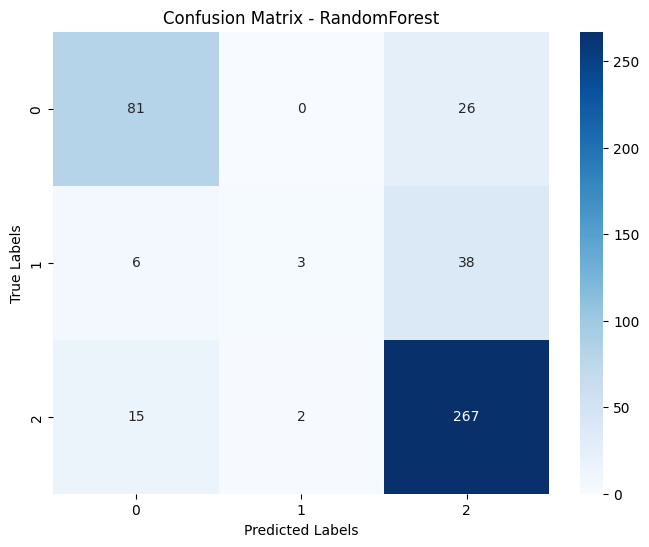

In [ ]:
# Generate classification report with zero_division parameter
rf_report = classification_report(y_test, rf_predictions, zero_division=0)
print("Random Forest:")
print(rf_report)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - RandomForest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Train the Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict labels for the test set
nb_predictions = nb.predict(X_test)

# Calculate accuracy using accuracy_score
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Accuracy:", nb_accuracy)

# Generate classification report
nb_report = classification_report(y_test, nb_predictions,zero_division=0)
print("Naive Bayes:")
print(nb_report)

Accuracy: 0.776255707762557
Naive Bayes:
              precision    recall  f1-score   support

    Negative       0.73      0.70      0.71       107
     Neutral       0.46      0.13      0.20        47
    Positive       0.80      0.91      0.85       284

    accuracy                           0.78       438
   macro avg       0.66      0.58      0.59       438
weighted avg       0.75      0.78      0.75       438



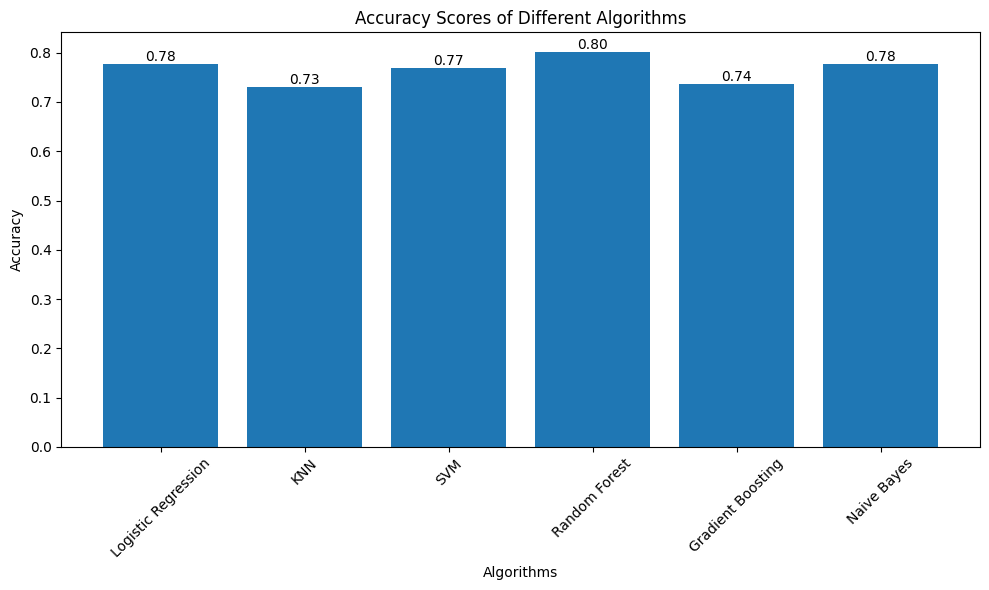

In [ ]:
import matplotlib.pyplot as plt

# Define the accuracy scores for each algorithm
accuracy_scores = [lr_accuracy, knn_accuracy, svm_accuracy, rf_accuracy, gb_accuracy, nb_accuracy]

# Define the algorithm names for the x-axis labels
algorithm_names = ['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'Gradient Boosting', 'Naive Bayes']

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(algorithm_names, accuracy_scores)
plt.title('Accuracy Scores of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Add the accuracy values on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()